**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png:
![art8.png](art8.png)
art8lab1.png:
![art8lab1.png](art8lab1.png)
art8lab2.png:
![art8lab2.png](art8lab2.png)
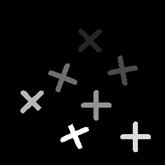
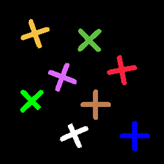
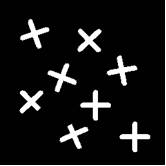

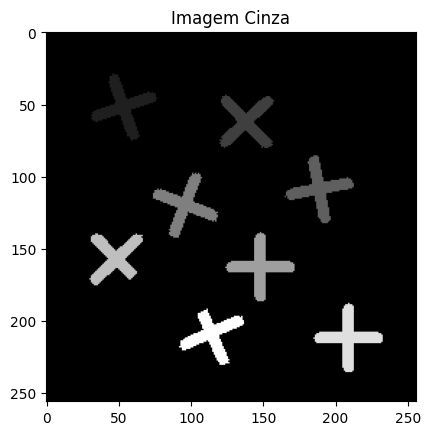

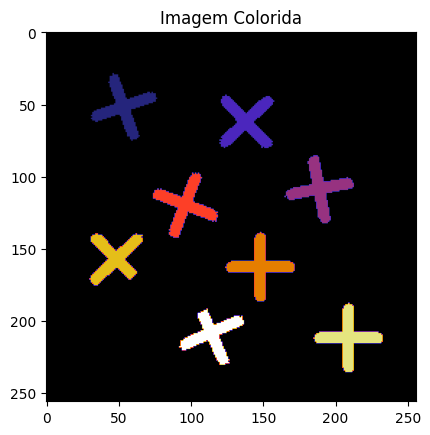

In [25]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)


def converte_binario(img, threshold):
    matriz_img_binaria = np.zeros_like(img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] < threshold:
                matriz_img_binaria[i, j] = 0
            else:
                matriz_img_binaria[i, j] = 1

    return matriz_img_binaria


def rotulacao_de_imagem_binaria(imagem_binaria, vizinhos):
    matriz_rotulada = np.zeros_like(imagem_binaria)
    linhas = range(imagem_binaria.shape[0])
    colunas = range(imagem_binaria.shape[1])
    pilha_coordenadas = []
    rotulo_atual = 1

    #Para cada linha percorre todas as colunas
    for i in linhas:
        for j in colunas:
            #Se a imagem original possuir um objeto(1) e a matriz etiquetada nao possui, adiciona a pilha
            if imagem_binaria[i, j] == 1 and matriz_rotulada[i, j] == 0:
                matriz_rotulada[i, j] = rotulo_atual
                pilha_coordenadas.append((i, j))
                #percorre os valores da pilha
                while pilha_coordenadas:
                    pixel_atual = pilha_coordenadas.pop()
                    #Atribui a coordenada de um vizinho de acordo com a lista passada na main do código
                    for coordenada_vizinho in vizinhos:
                        x = pixel_atual[0] + coordenada_vizinho[0]
                        y = pixel_atual[1] + coordenada_vizinho[1]

                        #Verifica se as coordenadas existem na imagem
                        if (x >= 0 and x < imagem_binaria.shape[0] and y >= 0 and y < imagem_binaria.shape[1]):
                            #Repete a verificacao se possui um objeto(1) e a matriz rotulada nao possui
                            if imagem_binaria[x, y] == 1 and matriz_rotulada[x, y] == 0:
                                #Atribui etiqueta
                                matriz_rotulada[x, y] = rotulo_atual
                                #adiciona na pilha para verificar seus vizinhos
                                pilha_coordenadas.append((x, y))
                rotulo_atual += 1

    return matriz_rotulada


def colorir_imagem(matriz_rotulada):
    linhas = range(matriz_rotulada.shape[0])
    colunas = range(matriz_rotulada.shape[1])
    #Cria Matriz com mesmo tamanho
    imagem_colorida = np.zeros_like(matriz_rotulada)
    for i in linhas:
        for j in colunas:
            if matriz_rotulada[i, j] != 0:
                imagem_colorida[i,j] = matriz_rotulada[i, j] * 255 / np.max(matriz_rotulada)

    return imagem_colorida


coord_vizinhanca_oito = [(0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1)]

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

imagem_binaria = converte_binario(img=img, threshold=67)
matriz_rotulada = rotulacao_de_imagem_binaria(imagem_binaria=imagem_binaria, vizinhos=coord_vizinhanca_oito)
image = colorir_imagem(matriz_rotulada=matriz_rotulada)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Cinza')
plt.show()

plt.imshow(image, cmap='CMRmap', vmin=0, vmax=255)
plt.title("Imagem Colorida")
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)


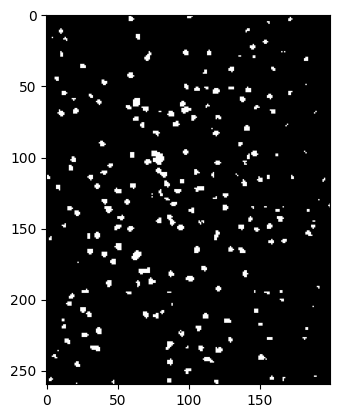

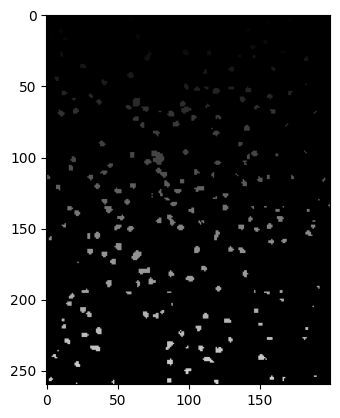

Numero de objetos na imagem: 212


In [24]:
img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)
imagem_binaria = converte_binario(img=img, threshold=167)

#img = 1 - img -> inverte sem fazer o for
for i in range(imagem_binaria.shape[0]):
    for j in range(imagem_binaria.shape[1]):
        if imagem_binaria[i,j] == 1:
            imagem_binaria[i,j] = 0
        else:
            imagem_binaria[i,j] = 1


coord_vizinhanca_oito = [(0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1)]

clc3thr1 = imagem_binaria * 255
plt.imshow(clc3thr1, cmap='gray', vmin=0, vmax=255)
plt.show()

clc3lab1 = rotulacao_de_imagem_binaria(imagem_binaria=imagem_binaria, vizinhos=coord_vizinhanca_oito)
elementos_rotulados = np.unique(clc3lab1)
plt.imshow(clc3lab1, cmap='gray', vmin=0, vmax=255)
plt.show()

elementos_rotulados = np.unique(clc3lab1)
print(f"Numero de objetos na imagem: {max(elementos_rotulados)}")